In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

1. Import the dataset and understand it.

In [2]:
loan=pd.read_csv('C:/Users/wajid/OneDrive/Desktop/Wajid- GL/Project 1/loan.csv')
print(loan.info)
print(loan.columns)
print(loan.describe)
#Dataset contains the complete loan data for all loans issued through the time period 2007 to 2011.
#There are 39717 rows x 23 columns

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade emp_length  ...  \
0       36 months   10.65%       162.87     B  10+ years  ... 

2. List down the number of rows and columns.

In [3]:
print('The number of columns are',len(loan.axes[1]))
print('The number of rows are',len(loan.axes[0]))

The number of columns are 23
The number of rows are 39717


3.‘Int_rate’ column is character type. With the help of lambda function
convert into float type.

In [4]:
for i in loan.loc[:,'int_rate']:
    a=(lambda i:float(i.strip('%')))
    b=(a(i))
type(b)   

float

4. Check the datatype of each column.

In [5]:
loan.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

5. Cleaning the dataset- Remove the columns having complete NaN value in
the entire dataset

In [6]:
s=loan.dropna(axis=1)
print(s)   

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade  annual_inc verification_status  \
0       36 months   10.65%       162.87     B     24000.0            Verified 

6. Write the code to find the value counts of the ‘loan_status’ category
column and filter only the ‘fully paid’ and ‘charged off’ categories.

In [7]:
V_fully_paid=loan['loan_status'].value_counts()['Fully Paid']
V_fully_paid
print('The number of Fully Paid loans are: ',V_fully_paid)
V_charged_off=loan['loan_status'].value_counts()['Charged Off']
V_charged_off
print('The number of Charged Off loans are: ',V_charged_off)

The number of Fully Paid loans are:  32950
The number of Charged Off loans are:  5627


7.Filter the ‘Emp_Len’ column to extract the numerical value from the
string.

In [73]:
loan['emp_filter']= loan['emp_length'].str.extractall('(\d+)').unstack()
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22,emp_filter,emp_filter1,emp
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN,10,10,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN,1,1,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN,10,10,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN,10,10,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,...,1213.88,2500.00,322.97,Jul-10,80.90,NaN,NaN,4,4,4
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,...,1020.51,8500.00,1413.49,Jul-10,281.94,NaN,NaN,3,3,3
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,...,1397.12,5000.00,272.16,Apr-08,0.00,NaN,NaN,1,1,1
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,...,672.66,5000.00,174.20,Jan-08,0.00,NaN,NaN,1,1,1


8.Using the Lambda function, remove the month from the ‘term’ column
such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [98]:
for i in loan.loc[:,'term']:
    q=lambda i:i.strip('months')
loan['term']= q(i)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,36,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,36,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07%,78.42,A,4 years,...,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28%,275.38,C,3 years,...,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07%,156.84,A,< 1 year,...,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43%,155.38,A,< 1 year,...,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,NaN,NaN


 9.Create a new column as risky_loan_applicant by comparing loan_amnt
and funded_amnt with the following criteria -
If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as
‘1’.

In [116]:
loan['risky_loan']=np.where(loan['loan_amnt']<=loan['funded_amnt'],0,1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22,emp_filter,emp_filter_1,emp_filter1,risky_loan
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,5000.00,863.16,Jan-15,171.62,NaN,NaN,10,10,10.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,456.46,435.17,Apr-13,119.66,NaN,NaN,1,1,1.0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,2400.00,605.67,Jun-14,649.91,NaN,NaN,10,10,10.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,10000.00,2214.92,Jan-15,357.48,NaN,NaN,10,10,10.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,2475.94,1037.39,May-16,67.79,NaN,NaN,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,...,2500.00,322.97,Jul-10,80.90,NaN,NaN,4,4,4.0,0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,...,8500.00,1413.49,Jul-10,281.94,NaN,NaN,3,3,3.0,0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,...,5000.00,272.16,Apr-08,0.00,NaN,NaN,1,1,1.0,0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,...,5000.00,174.20,Jan-08,0.00,NaN,NaN,1,1,1.0,0


10.Using the bar plot visualize the loan_status column against categorical
column grade, term, verification_status . Write the observation from
each graph

[Text(0.5, 1.0, 'Grade V/S loan_status')]

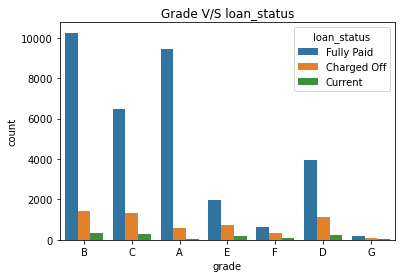

In [15]:
sns.countplot(x='grade', hue='loan_status', data=loan).set(title='Grade V/S loan_status')

[Text(0.5, 1.0, 'Term V/S Loan_status')]

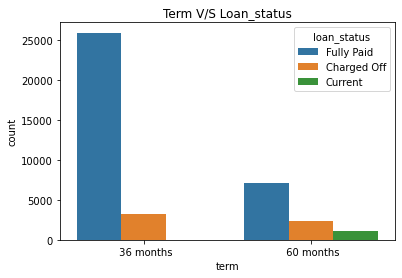

In [17]:
sns.countplot(x='term', hue='loan_status', data=loan).set(title='Term V/S Loan_status')

[Text(0.5, 1.0, 'Verification_status V/S Loan_status')]

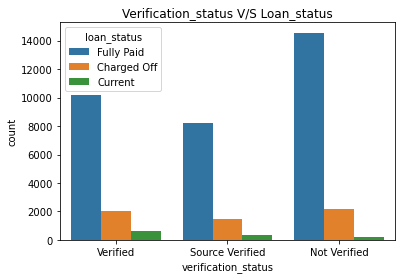

In [18]:
sns.countplot(x='verification_status', hue='loan_status', data=loan).set(title='Verification_status V/S Loan_status')

11.Using a user defined function convert the ‘emp_len’ column into
categorical column as follows -
If emp_len is less than equals to 1 then recode as ‘fresher’.
If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
If emp_len is greater than 3 and less than 7 then recode as ‘senior’
If emp_len is greater than 7 then recode as ‘expert’.


In [2]:
loan['emp_filter1']=loan['emp_filter'].astype(float)
def function(x):
    if x<=1:
        result ='Fresher'
    elif x>1 and x<3:
        result ='junior'
    elif x>3 and x<4:
        result ='senior'
    else:
        result= 'expert'
    return result

loan['emp_final']= loan['emp_filter1'].apply(function)
loan['emp_final']
loan

NameError: name 'loan' is not defined

12.Find the sum of ‘loan_amnt’ for each grade and display the distribution
of ‘loan_amnt’ using a pie plot

In [100]:
Filtered_grades_A = loan.loc[loan['grade']=='A'] 
Filtered_grades_B = loan.loc[loan['grade']=='B'] 
Filtered_grades_C = loan.loc[loan['grade']=='C'] 
Filtered_grades_D = loan.loc[loan['grade']=='D'] 
Filtered_grades_E = loan.loc[loan['grade']=='E'] 
Filtered_grades_F = loan.loc[loan['grade']=='F'] 
Filtered_grades_G = loan.loc[loan['grade']=='G']


In [147]:
A_loan=np.sum(Filtered_grades_A['loan_amnt'])
B_loan=np.sum(Filtered_grades_B['loan_amnt'])
C_loan=np.sum(Filtered_grades_C['loan_amnt'])
D_loan=np.sum(Filtered_grades_D['loan_amnt'])
E_loan=np.sum(Filtered_grades_E['loan_amnt'])
F_loan=np.sum(Filtered_grades_F['loan_amnt'])
G_loan=np.sum(Filtered_grades_G['loan_amnt'])


loan_amount=[A_loan,B_loan,C_loan,D_loan,E_loan,F_loan,G_loan]
Grades=['A', 'B', 'C', 'D', 'E', 'F', 'G']
px.pie(loan,names='grade',labels='loan_amount')